In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data =pd.read_csv(r"C:\Users\Admin\Downloads\data_for_lr (1).csv")

In [3]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [4]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [5]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [7]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [8]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [9]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [23]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) 
    parameters["c"] = np.random.uniform(0,1) 
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
       
        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 621.2531743621603


<Figure size 640x480 with 0 Axes>

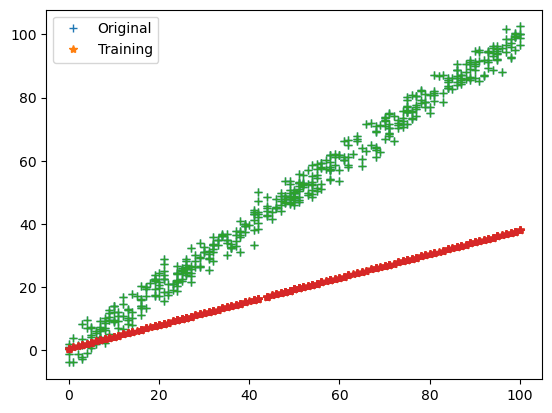

Iteration = 2, Loss = 284.0457700150742


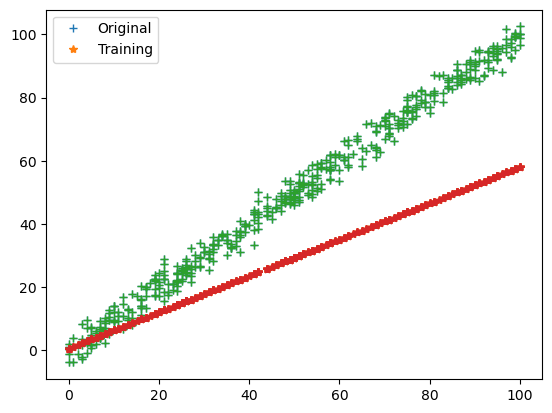

Iteration = 3, Loss = 131.05439482614238


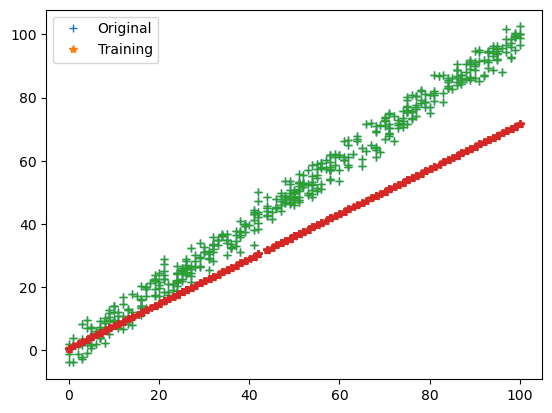

Iteration = 4, Loss = 61.64203611164886


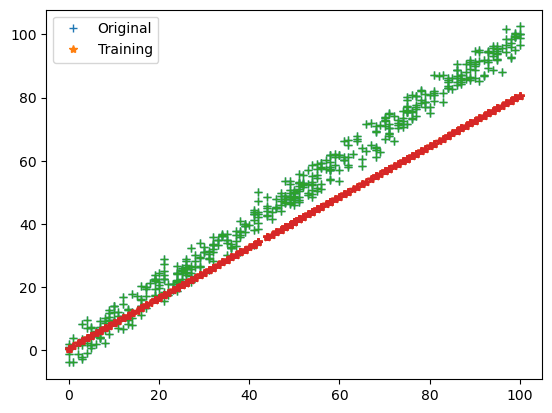

Iteration = 5, Loss = 30.14956974728868


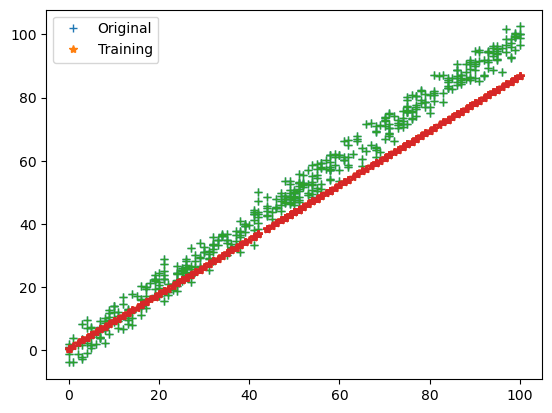

Iteration = 6, Loss = 15.861400543937052


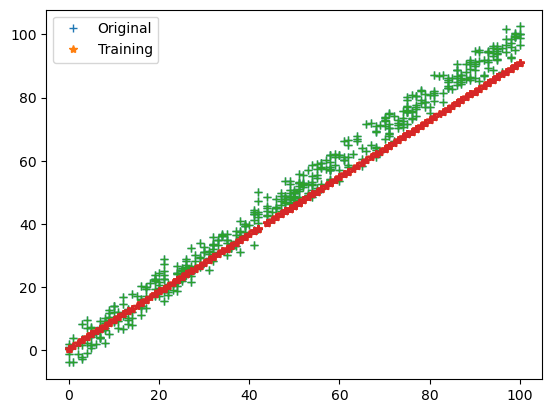

Iteration = 7, Loss = 9.37884001884103


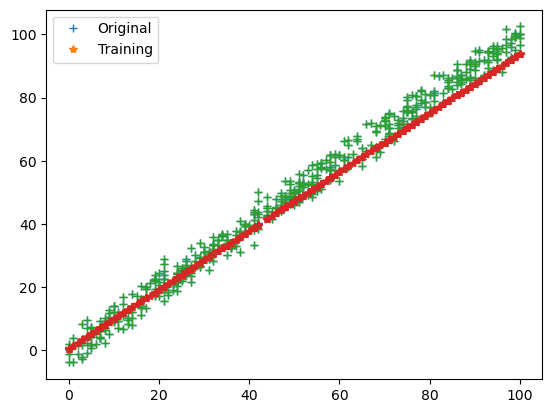

Iteration = 8, Loss = 6.437692797000899


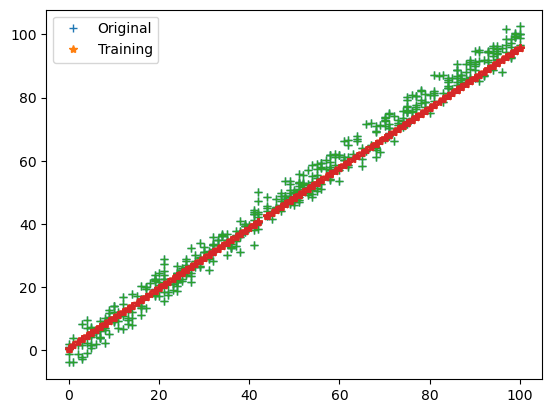

Iteration = 9, Loss = 5.103288713580729


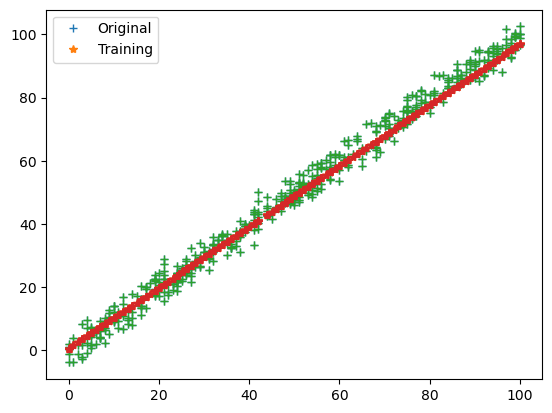

Iteration = 10, Loss = 4.497865771874039


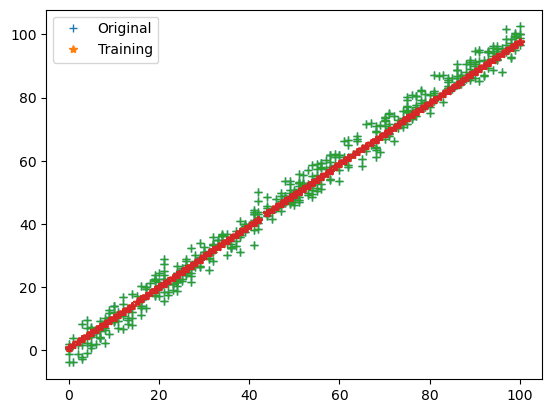

Iteration = 11, Loss = 4.223182381729743


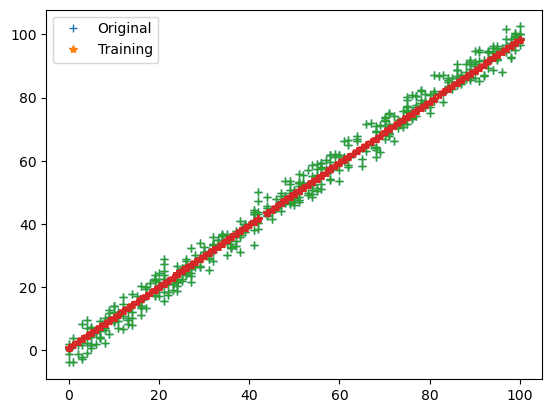

Iteration = 12, Loss = 4.098555892587466


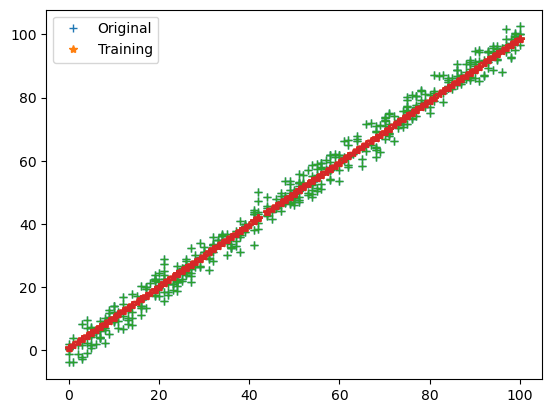

Iteration = 13, Loss = 4.042010385756431


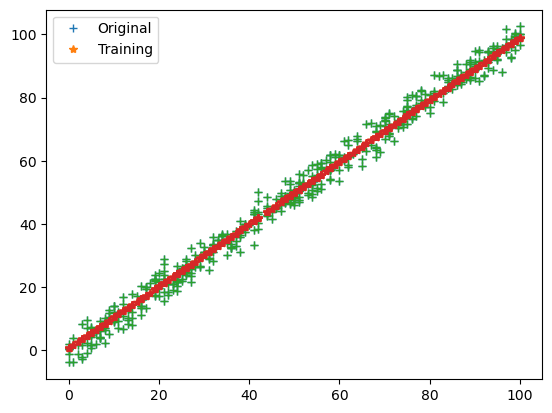

Iteration = 14, Loss = 4.016353296126709


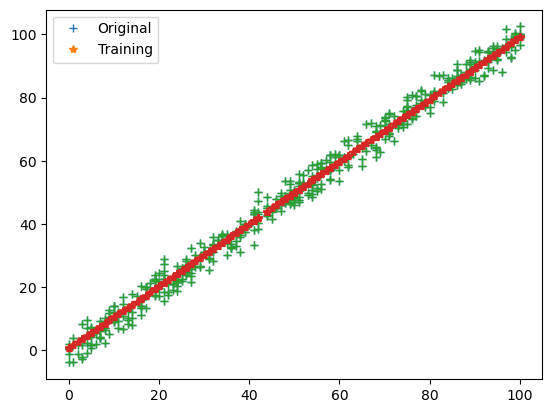

Iteration = 15, Loss = 4.004710315711904


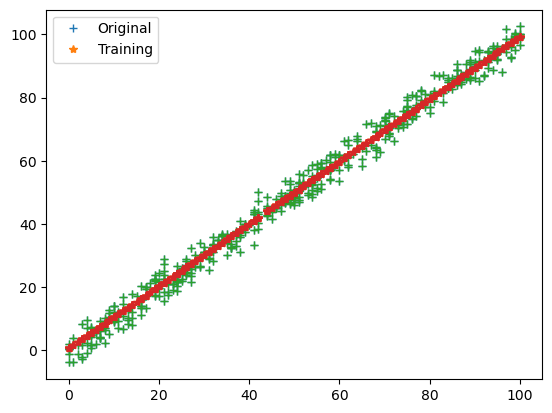

Iteration = 16, Loss = 3.999425552287904


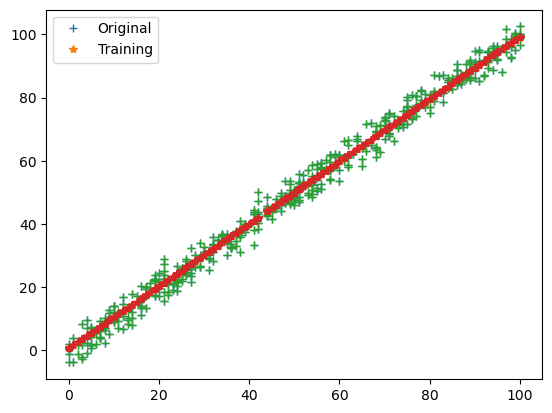

Iteration = 17, Loss = 3.9970255190726376


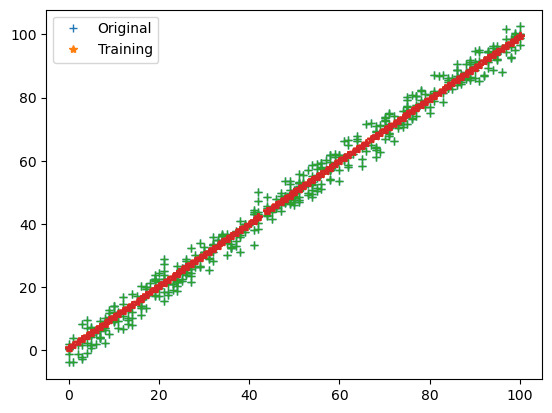

Iteration = 18, Loss = 3.995934291265704


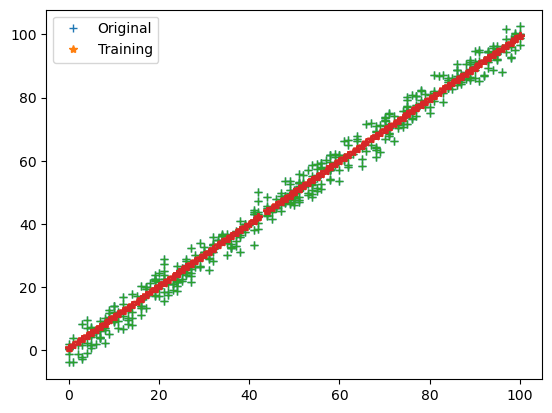

Iteration = 19, Loss = 3.99543687003959


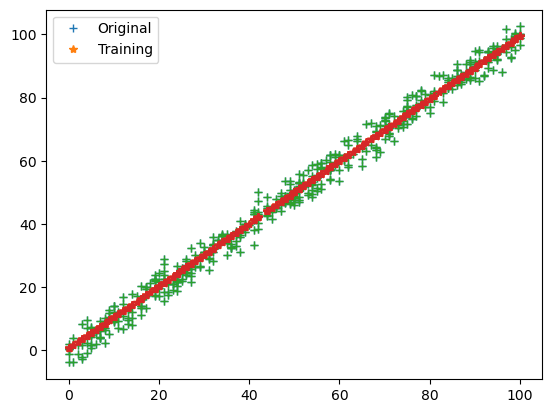

Iteration = 20, Loss = 3.9952088596342845


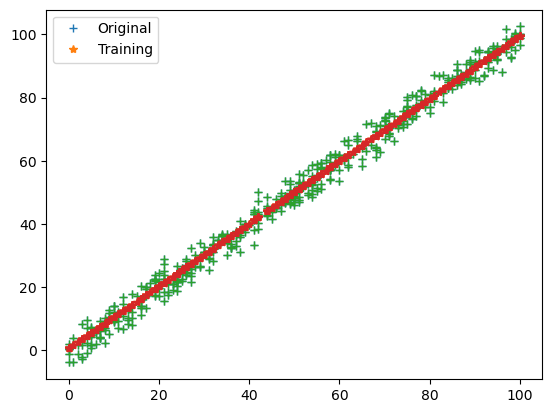

Iteration = 21, Loss = 3.995103081334156


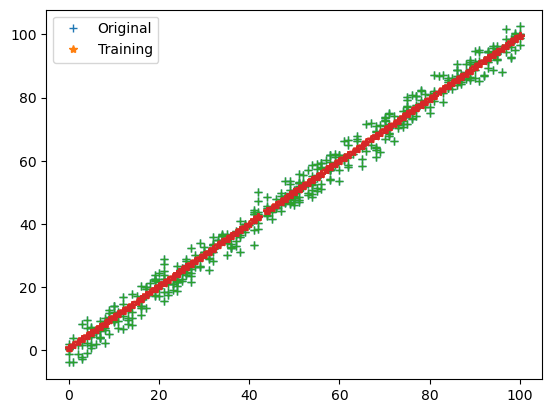

Iteration = 22, Loss = 3.9950527599928893


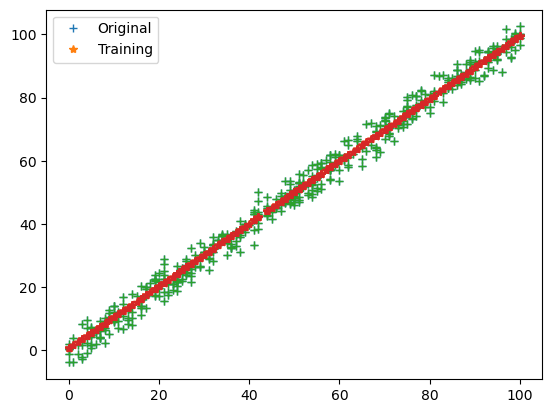

Iteration = 23, Loss = 3.9950275996526354


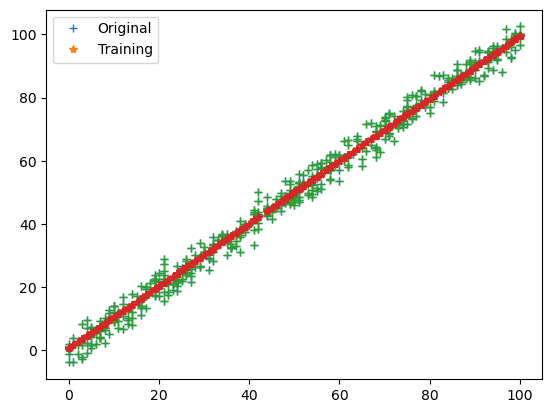

Iteration = 24, Loss = 3.995013855003754


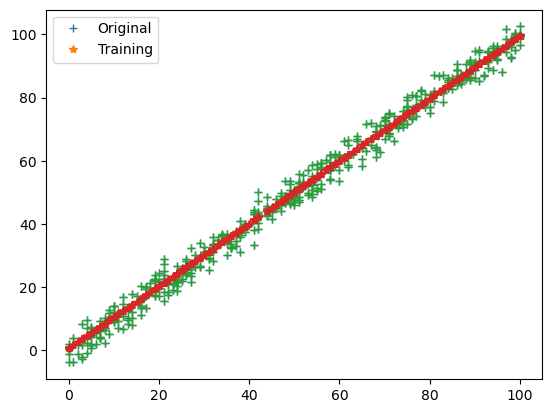

Iteration = 25, Loss = 3.995005289784031


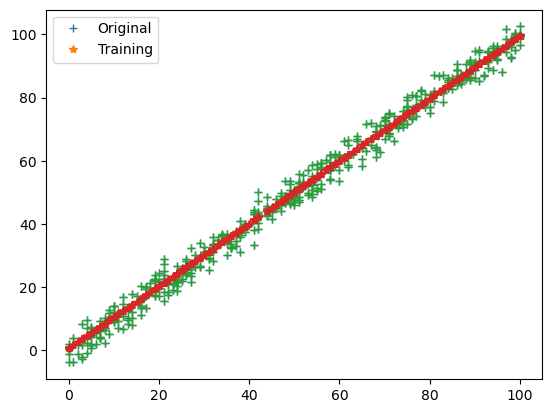

In [27]:
parameters, loss = train(train_input, train_output, 0.0001, 25)

In [28]:
print(parameters)

{'m': 0.9885564083329308, 'c': 0.5836701714473468}


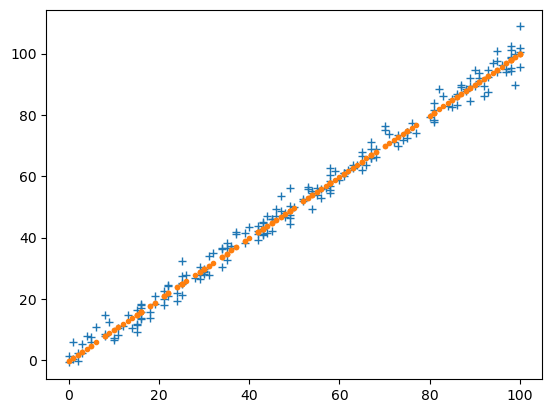

In [13]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [15]:
cost_function(test_predictions, test_output)

4.024476755019768